In [32]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# import training and test data from Kaggle
df = pd.read_csv("loan-train.csv")

In [36]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
# clean training data by filling in missing values with the most common value
df = train_df.copy() # copy df
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(train_df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [40]:
# check again for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# convert target label from "Y"/"N" to 1/0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

NameError: name 'df' is not defined

In [44]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education','Self_Employed', 'Property_Area', 'Dependents'], drop_first=True)

In [49]:
# drop loan id
df.drop('Loan_ID', axis=1, inplace=True)

In [51]:
# split features vs target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [53]:
# Step 5: Split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Step 6: Scale the data
scaler = X()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [59]:
# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# Step 8: Predict and evaluate
y_pred = model.predict(X_valid_scaled)

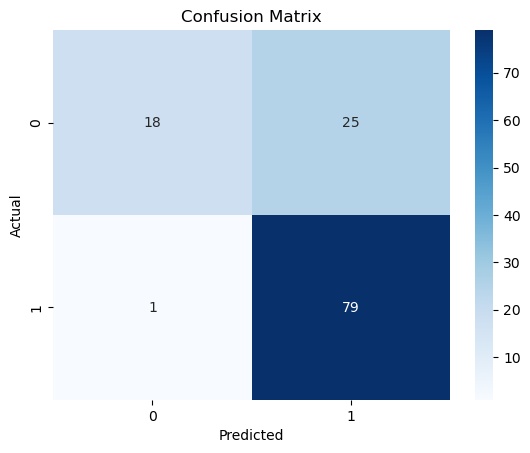

In [76]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))


Confusion Matrix:
[[18 25]
 [ 1 79]]


In [67]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [73]:
# Step 10: Show 5 misclassified examples
misclassified_indices = np.where(y_pred != y_valid)[0][:5]
print("\n5 Misclassified Samples:")
print(X_valid.iloc[misclassified_indices])
print("\nTrue Labels:", y_valid.iloc[misclassified_indices].values)
print("Predicted Labels:", y_pred[misclassified_indices])


5 Misclassified Samples:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
340             2647             1587.0       173.0             360.0   
77              1000             3022.0       110.0             360.0   
209             3418                0.0       127.0             360.0   
148            10000             1666.0       225.0             360.0   
457             3708             2569.0       173.0             360.0   

     Credit_History  Gender_Male  Married_Yes  Education_Not Graduate  \
340             1.0         True         True                    True   
77              1.0         True         True                   False   
209             1.0         True        False                   False   
148             1.0        False        False                   False   
457             1.0         True         True                   False   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  \
340              False  